In [11]:
#Loading the Model
from tensorflow.keras.applications import VGG16
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")
model.summary()

553476096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1200, 1800, 3)


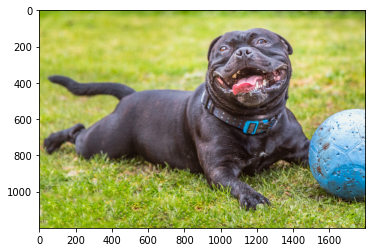

In [13]:
#Loading an Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)
show_image("/content/drive/MyDrive/6th Sem/CVDL/NVIDIA DEEP LEARNING/data/doggy_door_data/happy_dog.jpg")

In [14]:
#Preprocessing the Image
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input
def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread (image_path).shape)
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image
    processed_image = load_and_process_image  ("/content/drive/MyDrive/6th Sem/CVDL/NVIDIA DEEP LEARNING/data/doggy_door_data/brown_bear.jpg")

In [15]:
#Make a Prediction
from tensorflow.keras.applications.vgg16 import decode_predictions
def readable_prediction(image_path):
    # Show image
    FIXME
    # Load and pre-process image
    image = FIXME
    # Make predictions
    predictions = FIXME
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
49152/35363 [=========================================] - 0s 0us/step
Predicted: [[('n02093256', 'Staffordshire_bullterrier', 0.4509804), ('n02110958', 'pug', 0.3226327), ('n02099712', 'Labrador_retriever', 0.09343208)]]
(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02132136', 'brown_bear', 0.9853864), ('n02133161', 'American_black_bear', 0.013876164), ('n02410509', 'bison', 0.00026603605)]]
(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02123159', 'tiger_cat', 0.7365471), ('n02124075', 'Egyptian_cat', 0.17492676), ('n02123045', 'tabby', 0.045883942)]]


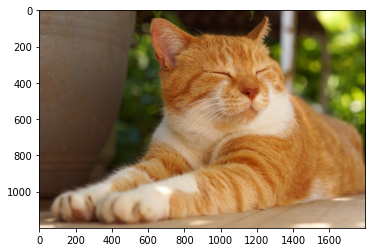

In [16]:
#Solution
from tensorflow.keras.applications.vgg16 import decode_predictions
def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))
readable_prediction("/content/drive/MyDrive/6th Sem/CVDL/NVIDIA DEEP LEARNING/data/doggy_door_data/happy_dog.jpg")
readable_prediction("/content/drive/MyDrive/6th Sem/CVDL/NVIDIA DEEP LEARNING/data/doggy_door_data/brown_bear.jpg")
readable_prediction("/content/drive/MyDrive/6th Sem/CVDL/NVIDIA DEEP LEARNING/data/doggy_door_data/sleepy_cat.jpg")